<a href="https://colab.research.google.com/github/YuvrajRawat/Pytorch-Basics-G.D-Tensors-Autograd-Linear-Regression/blob/main/Pytorch_Basics_%26_G_D_%7C_Tensors%2C_Autograd_%26_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
tensor1 = torch.tensor(5.) #tensor1 is a tensor having single element 4.0
tensor1

tensor(5.)

In [ ]:
tensor1.dtype #dtype function shows datatype of tensor1

torch.float32

In [ ]:
tensor2 = torch.tensor([1., 2, 3, 4]) #tensor2 considered as 1-D tensor called row vector
tensor2

tensor([1., 2., 3., 4.])

In [ ]:
tensor3 = torch.tensor([[1.],[2],[3.],[4]]) #coloumn vector
tensor3

tensor([[1.],
        [2.],
        [3.],
        [4.]])

In [ ]:
tensor4 = torch.tensor([[5, 6],
                        [6, 7],
                        [7, 8],
                        [8, 9]]) #tenssor4 is a matrix of 4 X 3 dimension
tensor4

tensor([[5, 6],
        [6, 7],
        [7, 8],
        [8, 9]])

In [ ]:
tensor5 = torch.tensor([[[1],[2]],
                        [[4],[5],[6]],
                        [[7],[8]],
                        [1]])
tensor5

ValueError: ignored

In [ ]:
print(tensor1)
tensor1.shape #because tensor1 have 0 dimension

tensor(5.)


torch.Size([])

In [ ]:
print(tensor2)
tensor2.shape #because tensor2 have 1 dimension... 4 element in 1 direction

tensor([1., 2., 3., 4.])


torch.Size([4])

In [ ]:
print(tensor3)
tensor3.shape #because tensor3 have 4 rows and 1 coloumn

tensor([[1.],
        [2.],
        [3.],
        [4.]])


torch.Size([4, 1])

In [ ]:
print(tensor4)
tensor4.shape #because tensor4 have 4 rows and 2 coloumn

tensor([[5, 6],
        [6, 7],
        [7, 8],
        [8, 9]])


torch.Size([4, 2])

In [ ]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [ ]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [ ]:
#compute derivative
y.backward()

In [ ]:
#display gradient
print('dy/dx:',x.grad)
print('dy/dw:',w.grad) #we are  interested in future output of w and b
print('dy/db:',b.grad)


dy/dx: None
dy/dw: tensor(6.)
dy/db: tensor(5.)


In [ ]:
#tensor Func.

In [ ]:
tensor5 = torch.full((3,2),42)   #full fuctionn create a tensor of given dimension of the given element
tensor5

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [ ]:
tensor6 = torch.full((3,2),52)
tensor6

tensor([[52, 52],
        [52, 52],
        [52, 52]])

In [ ]:
tensor7 = torch.cat((tensor5,tensor6))    #cat funct concatinate 2 tensor
tensor7

tensor([[42, 42],
        [42, 42],
        [42, 42],
        [52, 52],
        [52, 52],
        [52, 52]])

In [ ]:
tensor8 = torch.sin(tensor7)   #compute the sin of each element
tensor8

tensor([[-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [ 0.9866,  0.9866],
        [ 0.9866,  0.9866],
        [ 0.9866,  0.9866]])

In [ ]:
tensor9 = tensor8.reshape(3,2,2)
tensor9

tensor([[[-0.9165, -0.9165],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [ 0.9866,  0.9866]],

        [[ 0.9866,  0.9866],
         [ 0.9866,  0.9866]]])

In [ ]:
import numpy as np

x = np.array([[1,2],
              [3,4]])
x

array([[1, 2],
       [3, 4]])

In [ ]:
#convert numpy array to a torch tensor
y = torch.from_numpy(x)
y

tensor([[1, 2],
        [3, 4]])

In [ ]:
x.dtype , y.dtype

(dtype('int64'), torch.int64)

In [ ]:
#convert torch tensor to a numpy array
z = y.numpy()
z

array([[1, 2],
       [3, 4]])

## **Build Linear Regression Model**

In [ ]:
import numpy as np
import torch

In [ ]:
#input (temp., rainfall, humidity)
input = np.array([[73, 67, 89],
                  [56, 89, 79],
                  [46, 78, 92],
                  [78, 67, 89],
                  [34, 67, 89]], dtype = 'float32')

In [ ]:
#target (mango, banana)
target = np.array([[79, 69],
                  [99, 69],
                  [68, 52],
                  [79, 79],
                  [57, 29]], dtype = 'float32')

In [ ]:
#convert  input and target into tensor
input = torch.from_numpy(input)
target = torch.from_numpy(target)
print(input)
print(target)

tensor([[73., 67., 89.],
        [56., 89., 79.],
        [46., 78., 92.],
        [78., 67., 89.],
        [34., 67., 89.]])
tensor([[79., 69.],
        [99., 69.],
        [68., 52.],
        [79., 79.],
        [57., 29.]])


In [ ]:
#weight and bias
w = torch.randn(2,3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.5745, -1.5065,  1.5897],
        [-1.0951,  0.5492,  1.1875]], requires_grad=True)
tensor([0.3607, 0.4524], requires_grad=True)


In [ ]:
input @ w.t() + b #multiplication of input with weight transpose and adding the bias term

tensor([[ -1.0241,  62.9978],
        [-40.2991,  81.8219],
        [  2.6836, 102.1690],
        [ -3.8964,  57.5224],
        [ 21.3794, 105.7061]], grad_fn=<AddBackward0>)

In [ ]:
def model(x):
  return x @ w.t() + b

In [ ]:
#generate pred.
pred = model(input)
print(pred)

tensor([[ -1.0241,  62.9978],
        [-40.2991,  81.8219],
        [  2.6836, 102.1690],
        [ -3.8964,  57.5224],
        [ 21.3794, 105.7061]], grad_fn=<AddBackward0>)


In [ ]:
print(target)  #compare with target

tensor([[79., 69.],
        [99., 69.],
        [68., 52.],
        [79., 79.],
        [57., 29.]])


In [ ]:
diff = pred - target
torch.sum(diff * diff) / diff.numel()  # mse loss (represent info. loss in the model)

tensor(4727.7432, grad_fn=<DivBackward0>)

In [ ]:
def mse(t1, t2):
   diff = t1 - t2
   return torch.sum(diff * diff) / diff.numel()

In [ ]:
#compute loss
loss = mse(pred, target)
print(loss)

tensor(4727.7432, grad_fn=<DivBackward0>)


## **Compute** **gradient**

In [ ]:
#compute gradient
loss.backward()

In [ ]:
#gradient for weight
print(w)
print(w.grad)     # is the derivative of loss w.r.t the element of w

tensor([[-0.5745, -1.5065,  1.5897],
        [-1.0951,  0.5492,  1.1875]], requires_grad=True)
tensor([[-4864.8164, -6158.9102, -6936.7788],
        [  704.0787,  1670.4985,  2001.9237]])


In [ ]:
print(b)
print(b.grad)

tensor([0.3607, 0.4524], requires_grad=True)
tensor([-241.8939,   67.3303])


In [ ]:
print(w)
w - w.grad * 1e-5 # learning rate

tensor([[-0.5745, -1.5065,  1.5897],
        [-1.0951,  0.5492,  1.1875]], requires_grad=True)


tensor([[-0.5258, -1.4449,  1.6591],
        [-1.1021,  0.5325,  1.1675]], grad_fn=<SubBackward0>)

In [ ]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

In [ ]:
w,b

(tensor([[-0.5258, -1.4449,  1.6591],
         [-1.1021,  0.5325,  1.1675]], requires_grad=True),
 tensor([0.3631, 0.4517], requires_grad=True))

In [ ]:
#lets verify that the loss is actually lower
pred = model(input)
loss = mse(pred, target)
print(loss)

tensor(3653.2886, grad_fn=<DivBackward0>)


In [ ]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


## **Train the model using G.D**

In [ ]:
#generate prediction
pred = model(input)
print(pred)

tensor([[ 12.8298,  59.5822],
        [-26.6108,  78.3587],
        [ 16.1096,  98.6997],
        [ 10.2008,  54.0716],
        [ 33.3361, 102.5651]], grad_fn=<AddBackward0>)


In [ ]:
#calc. loss
loss = mse(pred, target)
print(loss)

tensor(3653.2886, grad_fn=<DivBackward0>)


In [ ]:
#compute gradient
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-4084.5000, -5171.0493, -5763.1074],
        [  508.3135,  1420.6321,  1705.2369]])
tensor([-67.2269,  19.0554])


In [ ]:
#adjust weight and reset gradient
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()

In [ ]:
print(w)
print(b)

tensor([[-0.4850, -1.3932,  1.7167],
        [-1.1072,  0.5183,  1.1504]], requires_grad=True)
tensor([0.3638, 0.4515], requires_grad=True)


In [ ]:
#calc. loss
pred = model(input)
loss = mse(pred, target)
print(loss)

tensor(2901.9631, grad_fn=<DivBackward0>)


## Train for Multiple Epochs

In [ ]:
#train for 200 epochs
for i in range(200):
  pred = model(input)
  loss = mse(pred, target)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
#calc. loss
pred = model(input)
loss = mse(pred, target)
print(loss)

tensor(393.5358, grad_fn=<DivBackward0>)


In [ ]:
#prediction
pred

tensor([[83.6535, 62.1181],
        [56.3503, 58.0362],
        [79.5778, 61.8579],
        [83.9460, 62.7105],
        [81.3724, 57.4972]], grad_fn=<AddBackward0>)

In [ ]:
#target
target

tensor([[79., 69.],
        [99., 69.],
        [68., 52.],
        [79., 79.],
        [57., 29.]])

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
train_ds = TensorDataset(input, target)
train_ds[0:3]

(tensor([[73., 67., 89.],
         [56., 89., 79.],
         [46., 78., 92.]]),
 tensor([[79., 69.],
         [99., 69.],
         [68., 52.]]))

In [ ]:
from torch.utils.data import DataLoader #it split our data into batches of pre-defined size

In [ ]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

In [ ]:
input

tensor([[73., 67., 89.],
        [56., 89., 79.],
        [46., 78., 92.],
        [78., 67., 89.],
        [34., 67., 89.]])

In [ ]:
for xb, yb in train_dl:
  print(xb)
  print(yb)
  break

tensor([[73., 67., 89.],
        [34., 67., 89.],
        [56., 89., 79.],
        [46., 78., 92.],
        [78., 67., 89.]])
tensor([[79., 69.],
        [57., 29.],
        [99., 69.],
        [68., 52.],
        [79., 79.]])


In [ ]:
import torch.nn as nn

## **NN**.**Linear**

In [ ]:
#define model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.3452, -0.0816, -0.2771],
        [-0.3707, -0.1247, -0.5456]], requires_grad=True)
Parameter containing:
tensor([-0.1642,  0.4622], requires_grad=True)


In [ ]:
#parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3452, -0.0816, -0.2771],
         [-0.3707, -0.1247, -0.5456]], requires_grad=True),
 Parameter containing:
 tensor([-0.1642,  0.4622], requires_grad=True)]

In [ ]:
#generate prediction
pred = model(input)
pred

tensor([[ -5.0957, -83.5079],
        [ -9.9890, -74.4937],
        [-16.1461, -76.5080],
        [ -3.3696, -85.3612],
        [-18.5596, -69.0516]], grad_fn=<AddmmBackward0>)

## **Loss Function**

In [ ]:
#import nn.functional
import torch.nn.functional as F

In [ ]:
#define loss funct.
loss_fn = F.mse_loss

In [ ]:
loss = loss_fn(model(input), target)
print(loss)

tensor(13551.7344, grad_fn=<MseLossBackward0>)


## **Optimizer**

In [ ]:
#define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5) #stochastic G.D indicates sample are selected in random batches instead of single groups

### **Train the Model**

In [ ]:
# define a utility funct. for train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):

  #repeat for given number of epochs
  for epochs in range(num_epochs):

    #train with batchs of data
    for xb, yb in train_dl:

      pred = model(xb)  # generate prediction
      loss = loss_fn(pred, yb)  #calc. loss
      loss.backward() #compute gradient
      opt.step()  #update parameters using gradients
      opt.zero_grad()  #reset gradient to zero

    if (epochs+1) % 10 == 0: #print the progress
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epochs+1,num_epochs, loss.item()))

In [ ]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 699.8545
Epoch [20/100], Loss: 180.3588
Epoch [30/100], Loss: 160.4640
Epoch [40/100], Loss: 154.5814
Epoch [50/100], Loss: 149.3117
Epoch [60/100], Loss: 144.2752
Epoch [70/100], Loss: 139.4516
Epoch [80/100], Loss: 134.8309
Epoch [90/100], Loss: 130.4039
Epoch [100/100], Loss: 126.1618


In [ ]:
#generate prediction
pred = model(input)
pred

tensor([[83.6771, 62.2183],
        [80.2584, 65.6384],
        [71.7265, 59.2611],
        [86.7589, 63.7272],
        [59.6389, 50.4483]], grad_fn=<AddmmBackward0>)

In [ ]:
#compare with target
target

tensor([[79., 69.],
        [99., 69.],
        [68., 52.],
        [79., 79.],
        [57., 29.]])

In [ ]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[76.8294, 55.9068]], grad_fn=<AddmmBackward0>)

## **Machine** **Learning** **vs**. **Classical** **Programming**

*Machine learning involves teaching a computer to recognise patterns by example, rather than programming it with specific rules. These patterns can be found in the data. In other words, ML is about creating algorithms (or a set of rules) that learn from complex functions (patterns) from data and make predictions on it (a form of “narrow AI”). ML learns from data and can be reused for unseen, future, or new data without rewriting code. Put another way, with ML, you start with a problem, identify data associated with that problem, use an algorithm to then model that problem, and generate output.*

*Classical Programming uses data and static, hard-coded rules to generate results whereas Machine Learning uses historical data or output, combined with new data, to generate new rules in a training model.*


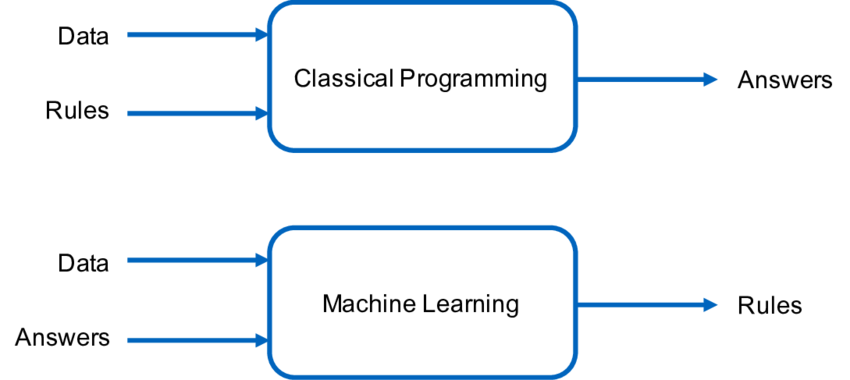